In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import investpy

In [7]:
ticker = 'XOM'
start = '01/06/2017'
end = '31/12/2017'

df = investpy.get_stock_historical_data(stock=ticker,
                                        country='United States',
                                        from_date=start,
                                        to_date=end)
print(df.head())

             Open   High    Low  Close    Volume Currency
Date                                                     
2017-06-01  80.37  80.90  80.19  80.70   9884090      USD
2017-06-02  80.59  80.68  79.26  79.50  21687304      USD
2017-06-05  79.44  80.39  79.40  80.12  11527068      USD
2017-06-06  80.30  81.32  80.22  81.21  12208648      USD
2017-06-07  81.05  81.40  80.34  80.91  13096541      USD


In [8]:
max_date = df.index.max()
min_date = df.index.min()
print("Min Date: " + str(min_date))
print("Max Date: " + str(max_date))

Min Date: 2017-06-01 00:00:00
Max Date: 2017-12-29 00:00:00


In [9]:
#price_min = 76 
price_min = df.Close.min()
print("Price min:" + str(price_min))

Price min:76.1


In [10]:
#price_max = 84 
price_max = df.Close.max()
print("Price max:" + str(price_max))

Price max:84.02


Level Price
0% Level:  84.02
23.6% Level:  82.15088
38.2% Level:  80.99455999999999
61.8% Level:  79.12544
100% Level:  76.1


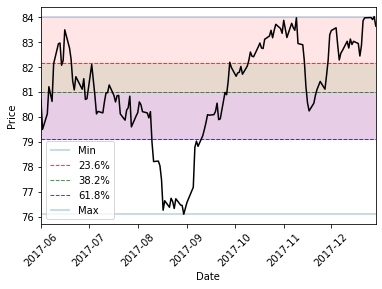

In [11]:
fig, ax = plt.subplots()

diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

print("Level", "Price")
print("0% Level: ", price_max)
print("23.6% Level: ", level1)
print("38.2% Level: ", level2)
print("61.8% Level: ", level3)
print("100% Level: ", price_min)

ax.axhspan(level2, level1, alpha=0.1, color='green')
ax.axhspan(level3, level2, alpha=0.1, color='blue')
ax.axhspan(price_max, level3, alpha=0.1, color='red')

plt.hlines(price_min, min_date, max_date, linewidth=2, color='C0', alpha=0.25, label='Min') 
plt.hlines(level1, min_date, max_date, linewidth=1, color='red', linestyles='dashed', alpha=0.75, label='23.6%') 
plt.hlines(level2, min_date, max_date, linewidth=1, color='green',  linestyles='dashed', alpha=0.75, label='38.2%') 
plt.hlines(level3, min_date, max_date, linewidth=1, color='blue',  linestyles='dashed', alpha=0.75, label='61.8%') 
plt.hlines(price_max, min_date, max_date, linewidth=2, color='C0', alpha=0.25, label='Max') 
ax.legend()

ax.set_xlim(min_date, max_date)
plt.ylabel("Price")
plt.xlabel("Date")
plt.xticks(rotation=45)

ax.plot(df.Close, color='black')
plt.show()